# A_gentle_introduction_to_autocorrelation_and_partial_autocorrelation

* Ref: [https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)
* Data: [https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Load data

In [11]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/daily-min-temperatures.csv',
                 index_col=0,
                 parse_dates=True)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


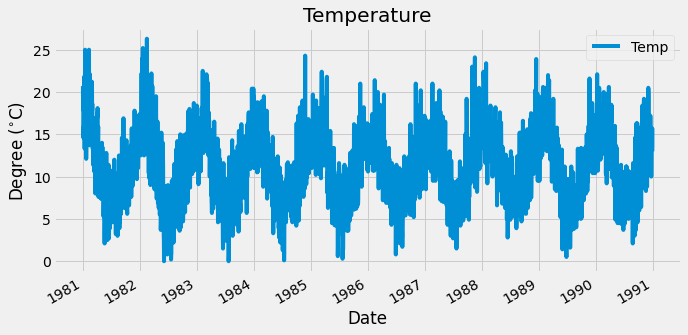

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(ax=ax)
ax.set_ylabel('Degree ($^{\circ}$C)')
ax.set_title('Temperature')
plt.show()

## 2. Analysis

* 如果兩個變數是呈現高斯分佈，那就能用 Pearson's correlation coefficient 來說明這兩個變數之間的關聯性 (correlation)
  * Pearson's correlation coefficient 是介於 -1 到 1 之間，0 表示兩變數之間沒有關聯性
* Lags 就是較早的 time steps 的觀察量 (observations)
* Time series 是比較目前的觀察量和稍早之前的觀察量之間的關聯性，因此特別稱為 autocorrelation
* ACF: **A**uto**C**orrelation **F**unction
    * 包含了直接和間接的 correlation
    * $X_{1}(t)$ 的 $X_{1}(t-i)$ 是直接 correlation (變數和之前的時刻的同一個變數之間的關聯性)
    * $X_{1}(t)$ 的 $X_{2}(t-i)$ 是間接 correlation (變數和之前的時刻的不同變數之間的關聯性)
    * 可以決定 $q$ 值大概要多少
      * 第一個碰到 95% CI 的那個 $q$ 值，或者是前一個 $q$ 值
* PACF: **P**artial **A**uto**c**orrelation **F**unction: 移除了 intervening time steps 干擾造成的影響後的 correlation
    * 把間接的 correlation 移除了，只剩下直接的
    * $X_{1}(t)$ 的 $X_{1}(t-i)$ correlation
    * 可以決定 $p$ 值大概要多少
      * 第一個碰到 95% CI 的那個 $p$ 值，或者是前一個 $p$ 值

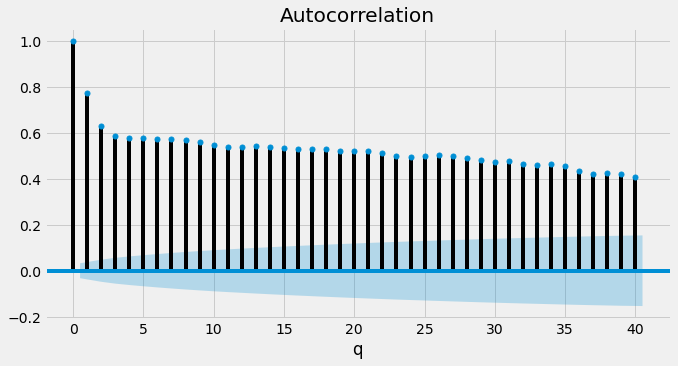

In [15]:
# Use plot_acf() to make autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df, ax=ax, lags=40) # 可以指定要畫多少個 lags，建議用比 3 個 full cycles 多一點點，1 年 12 個，三年就 36 個，比 36 多一點點就用 40 個
ax.set_xlabel('q')
plt.show()

* 色塊包住的範圍是 95% confidence intervals
* 在色塊外面的表示是真的有高度的 correlation

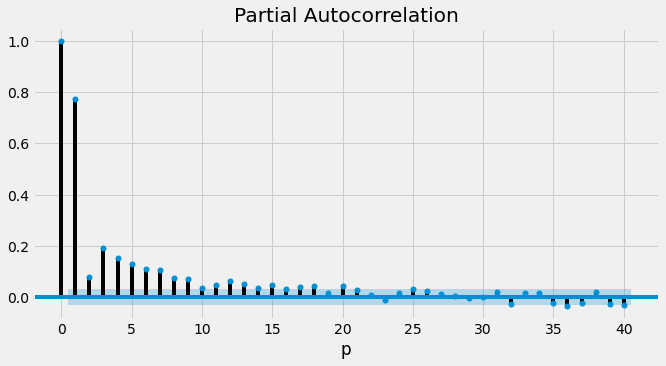

In [16]:
# Use plot_pacf() to make partial autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df, lags=40, ax=ax) # 只看前 40 個 lags 的 pacf
ax.set_xlabel('p')
plt.show()

* 在 Autoregressive model AR(k) 中
    * ACF 在 lag=k 的 correlation 最大，然後遞減 
    * PACF 在 lag=k 之後沒有 correlation
* 在 Moving Average model MA(k) 中
    * ACF: lag=k 的 correlation 最大，然後迅速遞減 
    * PACF: lag=k 的 correlation 最大，然後慢慢遞減